In [23]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# 1. Cargar y preparar los datos
data = pd.read_csv('DatosSingapore.csv')  # Reemplazar con el archivo limpio
data.dropna(inplace=True)  # Asegurarnos de no tener datos faltantes



print(data.head())

       id  host_id  host_response_rate  host_acceptance_rate  \
0   71896   367042                 1.0                   1.0   
1   71903   367042                 1.0                   1.0   
2  294281  1521514                 1.0                   1.0   
3  344803   367042                 1.0                   1.0   
4  369141  1521514                 1.0                   1.0   

   host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0              False                         10                  True   
1              False                         10                  True   
2              False                          8                  True   
3              False                         10                  True   
4              False                          8                  True   

   host_identity_verified  latitude  longitude  ...  \
0                    True   1.34754  103.95958  ...   
1                    True   1.34531  103.96100  ...   
2          

Epoch 1/50


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7486 - loss: 0.5112 - val_accuracy: 0.8338 - val_loss: 0.3670
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8458 - loss: 0.3439 - val_accuracy: 0.8560 - val_loss: 0.3190
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8778 - loss: 0.2944 - val_accuracy: 0.8698 - val_loss: 0.2933
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8924 - loss: 0.2556 - val_accuracy: 0.8698 - val_loss: 0.2766
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8993 - loss: 0.2244 - val_accuracy: 0.8781 - val_loss: 0.2795
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9153 - loss: 0.2152 - val_accuracy: 0.8920 - val_loss: 0.2665
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9160 - loss: 0.2072 - val_accuracy: 0.8837 - val_loss: 0.2662
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9292 - loss: 0.1822 - val_accuracy: 0.8975 - val_loss: 0.2633
Ep

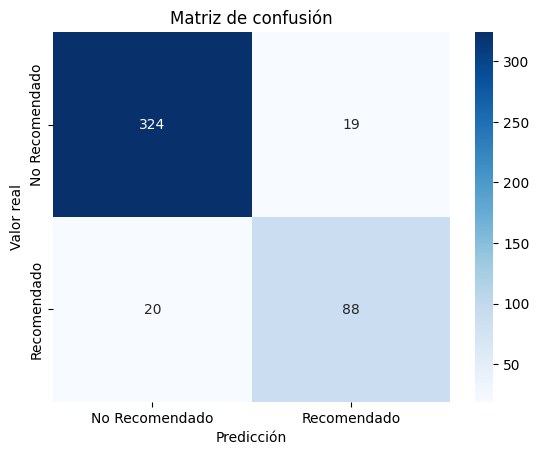

Métricas adicionales:
Exactitud (Accuracy): 0.91
Precisión (Precision): 0.82
Cobertura (Recall): 0.81
F1-Score: 0.82
ROC-AUC Score: 0.95


In [25]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar y preparar los datos
data = pd.read_csv('DatosSingapore.csv')  # Reemplazar con el archivo limpio
data.dropna(inplace=True)  # Eliminar datos faltantes

# Crear la variable objetivo para clasificación
data['recommended'] = np.where(
    (data['price'] <= 200) & 
    (data['review_scores_rating'] >= 4.5) & 
    (data['bedrooms'] >= 1) &
    (data['amenities_number'] >= 5) &
    (data['host_response_rate'] >= 0.79), 1, 0
)

# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['recommended', 'price'])
y = data['recommended']

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo de clasificación
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Activación sigmoid para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recomendado', 'Recomendado'], yticklabels=['No Recomendado', 'Recomendado'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

# Calcular métricas adicionales
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)

# Mostrar métricas adicionales
print("Métricas adicionales:")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Cobertura (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

2025/11/28 10:57:13 INFO mlflow.tracking.fluent: Experiment with name '/ClasificacionAlejo' does not exist. Creating a new experiment.


Distribución de la variable objetivo:
recommended
0    1711
1     541
Name: count, dtype: int64
Porcentaje de recomendados: 24.02%


Exception: Run with UUID bc29555d2c91440ba3b16e4ec3cf3a85 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True